In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
import seaborn as sns
from rdkit.Chem import AllChem
import numpy as np
from rdkit import DataStructs
from sklearn.cluster import KMeans

RDKit WARNING: [08:45:23] Enabling RDKit 2019.09.3 jupyter extensions


Read the data

In [2]:
df = pd.read_csv("A2a.smi",sep=" ",header=None)

Add the column labels

In [3]:
df.columns = ["SMILES","Name","pIC50"]

In [4]:
df.head()

,SMILES,Name,pIC50
0,CNCC1CC2c3ccccc3Cc3ccccc3N2O1,CHEMBL81485,6.360
1,CN(C)CC1CC2c3ccccc3Cc3ccccc3N2O1,CHEMBL83658,6.430
2,CN1CCN2c3ccccc3Cc3ccccc3C2C1,CHEMBL6437,7.525
3,CN(C)CC1CC2c3ccccc3Cc3ccc(Cl)cc3N2O1,CHEMBL315772,6.320
4,CC(N)Cc1c[nH]c2ccc3c(c12)CCCO3,CHEMBL133455,4.720


Add a molecule column to the dataframe

In [5]:
df['Mol'] = [Chem.MolFromSmiles(x) for x in df.SMILES]

Add a LogP column

In [6]:
df['LogP'] = [Descriptors.MolLogP(x) for x in df.Mol]

In [7]:
df.head()

,SMILES,Name,pIC50,Mol,LogP
0,CNCC1CC2c3ccccc3Cc3ccccc3N2O1,CHEMBL81485,6.360,<rdkit.Chem.rdchem.Mol object at 0x1a2719ef80>,3.0618
1,CN(C)CC1CC2c3ccccc3Cc3ccccc3N2O1,CHEMBL83658,6.430,<rdkit.Chem.rdchem.Mol object at 0x1a2719ef30>,3.4040
2,CN1CCN2c3ccccc3Cc3ccccc3C2C1,CHEMBL6437,7.525,<rdkit.Chem.rdchem.Mol object at 0x1a2719eee0>,3.0839
3,CN(C)CC1CC2c3ccccc3Cc3ccc(Cl)cc3N2O1,CHEMBL315772,6.320,<rdkit.Chem.rdchem.Mol object at 0x1a271a1030>,4.0574
4,CC(N)Cc1c[nH]c2ccc3c(c12)CCCO3,CHEMBL133455,4.720,<rdkit.Chem.rdchem.Mol object at 0x1a271a1080>,2.3826


Add a LogP column and a Bin coloumn for coloring

In [8]:
df['LipE'] = df.pIC50 - df.LogP
df['Bin'] = pd.cut(df.LipE,bins=[-100,2,3,4,5,6,100],labels=[1,2,3,4,5,6])

In [9]:
df

,SMILES,Name,pIC50,Mol,LogP,LipE,Bin
0,CNCC1CC2c3ccccc3Cc3ccccc3N2O1,CHEMBL81485,6.360,<rdkit.Chem.rdchem.Mol object at 0x1a2719ef80>,3.06180,3.29820,3
1,CN(C)CC1CC2c3ccccc3Cc3ccccc3N2O1,CHEMBL83658,6.430,<rdkit.Chem.rdchem.Mol object at 0x1a2719ef30>,3.40400,3.02600,3
2,CN1CCN2c3ccccc3Cc3ccccc3C2C1,CHEMBL6437,7.525,<rdkit.Chem.rdchem.Mol object at 0x1a2719eee0>,3.08390,4.44110,4
3,CN(C)CC1CC2c3ccccc3Cc3ccc(Cl)cc3N2O1,CHEMBL315772,6.320,<rdkit.Chem.rdchem.Mol object at 0x1a271a1030>,4.05740,2.26260,2
4,CC(N)Cc1c[nH]c2ccc3c(c12)CCCO3,CHEMBL133455,4.720,<rdkit.Chem.rdchem.Mol object at 0x1a271a1080>,2.38260,2.33740,2
...,...,...,...,...,...,...,...
198,CCN1CCCC1CNC(=O)c1cc(S(N)(=O)=O)ccc1OC,CHEMBL26,5.700,<rdkit.Chem.rdchem.Mol object at 0x1a271a4df0>,0.55670,5.14330,5
199,O=C(c1ccc(OCCN2CCCCC2)cc1)c1c(-c2ccc(O)cc2)sc2...,CHEMBL81,5.780,<rdkit.Chem.rdchem.Mol object at 0x1a271a4e40>,6.07520,-0.29520,1
200,N=C(Nc1ccc2c(c1)CCN2C1CCNCC1)c1cccs1,CHEMBL2203713,4.620,<rdkit.Chem.rdchem.Mol object at 0x1a271a4e90>,3.30007,1.31993,1
201,Cc1ccc(OCC(O)C(C)NC(C)C)c2c1CCC2,CHEMBL513389,9.300,<rdkit.Chem.rdchem.Mol object at 0x1a271a4ee0>,2.60992,6.69008,6


A few settting for plot aesthetics

In [10]:
sns.set(rc={'figure.figsize': (8, 8)})
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

Draw the plot

In [11]:
def draw_lipE_lines(ax):
    for lipE in range(2,7):
        ax.plot([0,9],[lipE,lipE+9],color="black",ls="--")
    ax.set(xlim=[0,8],ylim=[4,10])
    ax.set(xlabel="LogP",ylabel="pIC50")
    box_style = bbox=dict(boxstyle="round",ec='black',fc='white')
    x_pos = 6
    for lipE in range(2,7):
        ax.text(x_pos,8.5,f"LipE={lipE}",rotation=53,bbox=box_style)
        x_pos = x_pos-1

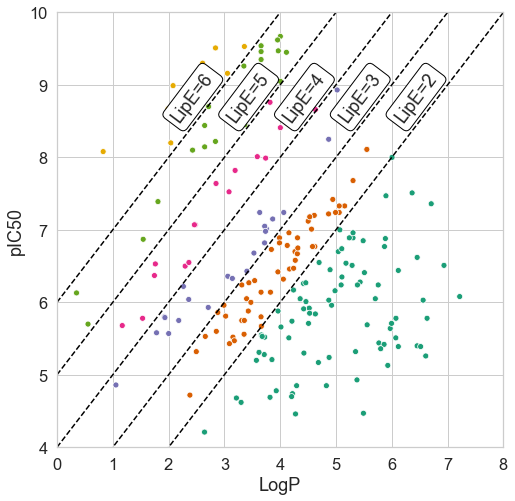

In [12]:
colors = sns.color_palette('Dark2',len(df.Bin.unique()))
ax = sns.scatterplot(x="LogP",y="pIC50",data=df,color="blue",hue="Bin",legend=False,palette=colors)
draw_lipE_lines(ax)

In [13]:
def fp_as_array(mol,n_bits=2048):
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=n_bits)
    arr = np.zeros((1,), np.int)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

In [14]:
df['fp'] = [fp_as_array(x,1024) for x in df.Mol]

In [15]:
km = KMeans(10)
df['cluster'] = km.fit_predict(list(df.fp))

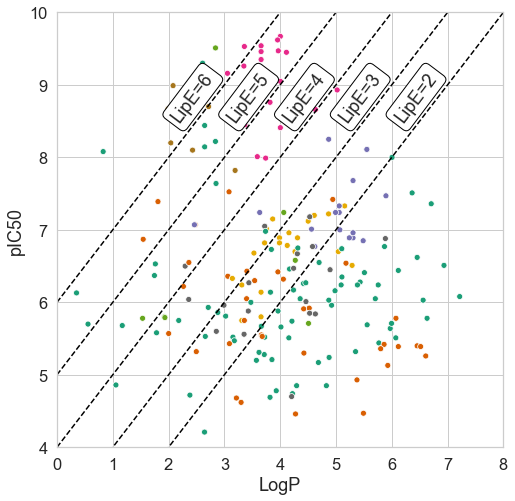

In [16]:
colors = sns.color_palette('Dark2',len(df.cluster.unique()))
ax = sns.scatterplot(x="LogP",y="pIC50",data=df,hue="cluster",legend=False,palette=colors)
draw_lipE_lines(ax)